In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
data=pd.read_csv("Data/Sales.Dirty.csv",dtype={"Order ID":"object"})

In [3]:
data.head()

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Ship Date
0,3,Male,Low,6,261.54,0.04,Regular Air,-213.25,38.94,35,25000,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,#VALUE!
1,293,10/1/2012,High,49,10123.02,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,10/2/2012
2,293,10/1/2012,High,27,244.57,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,10/3/2012
3,483,7/10/2011,High,NaN,4965.7595,0.08,Regular Air,1198.97,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,7/12/2011
4,515,8/28/2010,Not Specified,19,394.27,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,8/30/2010


In [4]:
data.shape

(8399, 19)

In [5]:
data.tail()

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Ship Date
8394,55558,8/9/2010,Medium,8,1294.04,0.05,Delivery Truck,-323.18,150.98,66.27,Mick Brown,Alberta,West,Consumer,Furniture,Bookcases,Bush Mission Pointe Library,Jumbo Box,8/9/2010
8395,55558,8/9/2010,Medium,23,392.57,0.04,Regular Air,22.25,17.07,8.13,Mick Brown,Alberta,West,Consumer,Office Supplies,Envelopes,Recycled Interoffice Envelopes with Re-Use-A-S...,Small Box,8/11/2010
8396,56550,4/8/2011,Not Specified,37,823.78,0.03,Express Air,343.05,22.23,5.08,Frank Hawley,Alberta,West,Home Office,Furniture,Office Furnishings,"Executive Impressions 14""",Small Pack,4/10/2011
8397,56550,4/8/2011,Not Specified,8,469.8375,0.00,Regular Air,-159.24,65.99,8.99,Frank Hawley,Alberta,West,Home Office,Technology,Telephones and Communication,Talkabout T8367,Small Box,4/9/2011
8398,56581,2/8/2009,High,20,2026.01,0.10,Express Air,580.43,105.98,13.99,Grant Donatelli,Alberta,West,Consumer,Furniture,Office Furnishings,"Tenex 46"" x 60"" Computer Anti-Static Chairmat,...",Medium Box,2/11/2009


In [6]:
data.columns

Index(['Order ID', 'Order Date', 'Order Priority', 'Order Quantity', 'Sales',
       'Discount', 'Ship Mode', 'Profit', 'Unit Price', 'Shipping Cost',
       'Customer Name', 'Province', 'Region', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Name',
       'Product Container', 'Ship Date'],
      dtype='object')

In [7]:
data.rename(columns={"Order ID":"Order_ID","Order Date":"Order_Date",
                     "Order Priority":"Order_Priority",
                       "Order Quantity":"Order_Quantity","Ship Mode":"Ship_Mode",
                    "Unit Price":"Unit_Price","Shipping Cost":"Shipping_Cost",
                    "Customer Name":"Customer_Name","Customer Segment":"Customer_Segment",
                    "Product Category":"Product_Category","Product Sub-Category":"Product_Sub-Category",
                    "Product Name":"Product_Name","Product Container":"Product_Container",
                    "Ship Date":"Ship_Date"},inplace=True)

In [8]:
data.head()

,Order_ID,Order_Date,Order_Priority,Order_Quantity,Sales,Discount,Ship_Mode,Profit,Unit_Price,Shipping_Cost,Customer_Name,Province,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container,Ship_Date
0,3,Male,Low,6,261.54,0.04,Regular Air,-213.25,38.94,35,25000,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,#VALUE!
1,293,10/1/2012,High,49,10123.02,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,10/2/2012
2,293,10/1/2012,High,27,244.57,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,10/3/2012
3,483,7/10/2011,High,NaN,4965.7595,0.08,Regular Air,1198.97,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,7/12/2011
4,515,8/28/2010,Not Specified,19,394.27,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,8/30/2010


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 19 columns):
Order_ID                7854 non-null object
Order_Date              8390 non-null object
Order_Priority          8387 non-null object
Order_Quantity          8398 non-null object
Sales                   8380 non-null object
Discount                8399 non-null float64
Ship_Mode               8395 non-null object
Profit                  8399 non-null object
Unit_Price              8399 non-null float64
Shipping_Cost           8399 non-null object
Customer_Name           8398 non-null object
Province                8399 non-null object
Region                  8369 non-null object
Customer_Segment        8399 non-null object
Product_Category        8368 non-null object
Product_Sub-Category    8399 non-null object
Product_Name            8386 non-null object
Product_Container       8384 non-null object
Ship_Date               8389 non-null object
dtypes: float64(2), object(17)
memor

In [10]:
data.describe()

,Discount,Unit_Price
count,8399.000000,8399.000000
mean,0.049671,89.331438
std,0.031823,290.441095
min,0.000000,-456.000000
25%,0.020000,6.480000
50%,0.050000,20.990000
75%,0.080000,85.990000
max,0.250000,6783.020000


In [11]:
data.describe(include=["object"])

,Order_ID,Order_Date,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Shipping_Cost,Customer_Name,Province,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container,Ship_Date
count,7854,8390,8387,8398,8380,8395,8399,8399,8398,8399,8369,8399,8368,8399,8386,8384,8389
unique,5141,1422,6,56,8131,3,7807,653,802,13,8,4,3,17,1263,7,1460
top,43745,9/15/2011,High,31,Bad,Regular Air,-969.05,19.99,Darren Budd,Ontario,West,Corporate,Office Supplies,Paper,"Global High-Back Leather Tilter, Burgundy",Small Box,5/21/2011
freq,6,20,1765,202,9,6268,8,352,41,1826,1991,3076,4592,1225,24,4341,19


In [12]:
data.isnull().sum()

Order_ID                545
Order_Date                9
Order_Priority           12
Order_Quantity            1
Sales                    19
Discount                  0
Ship_Mode                 4
Profit                    0
Unit_Price                0
Shipping_Cost             0
Customer_Name             1
Province                  0
Region                   30
Customer_Segment          0
Product_Category         31
Product_Sub-Category      0
Product_Name             13
Product_Container        15
Ship_Date                10
dtype: int64

In [13]:
data=data.dropna(how='any',subset=["Order_ID","Order_Date","Order_Priority","Order_Quantity"
                                   ,"Ship_Mode"
                                   ,"Customer_Name","Region","Product_Category",
                                  "Product_Name","Product_Container","Ship_Date"])

In [14]:
data.reset_index(drop=True,inplace=True)

In [15]:
data.head()

,Order_ID,Order_Date,Order_Priority,Order_Quantity,Sales,Discount,Ship_Mode,Profit,Unit_Price,Shipping_Cost,Customer_Name,Province,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container,Ship_Date
0,3,Male,Low,6,261.54,0.04,Regular Air,-213.25,38.94,35,25000,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,#VALUE!
1,293,10/1/2012,High,49,10123.02,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,10/2/2012
2,293,10/1/2012,High,27,244.57,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,10/3/2012
3,515,8/28/2010,Not Specified,19,394.27,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,8/30/2010
4,613,6/17/2011,High,12,93.54,0.03,Regular Air,-54.04,7.30,7.72,Carl Jackson,Nunavut,Nunavut,Corporate,Office Supplies,Binders and Binder Accessories,"Angle-D Binders with Locking Rings, Label Holders",Small Box,6/17/2011


In [16]:
data.isnull().sum()

Order_ID                 0
Order_Date               0
Order_Priority           0
Order_Quantity           0
Sales                   19
Discount                 0
Ship_Mode                0
Profit                   0
Unit_Price               0
Shipping_Cost            0
Customer_Name            0
Province                 0
Region                   0
Customer_Segment         0
Product_Category         0
Product_Sub-Category     0
Product_Name             0
Product_Container        0
Ship_Date                0
dtype: int64

In [17]:
data["Sales"].dtypes

dtype('O')

In [18]:
data["Sales"].isnull().value_counts()

False    7738
True       19
Name: Sales, dtype: int64

In [19]:
data["Sales"].fillna('aba',inplace=True)

In [20]:
data['Sales'].isnull().sum()

0

In [21]:
count=0
for i in data["Sales"]:
    if (any(x.isalpha() for x in i)):
        data.loc[count,"Sales"]=np.nan
    count+=1

In [22]:
data['Sales'].isnull().sum()

33

In [23]:
data['Sales']=data['Sales'].astype('float')

In [24]:
Sales_mean=data['Sales'].mean()
data['Sales'].fillna(Sales_mean,inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7757 entries, 0 to 7756
Data columns (total 19 columns):
Order_ID                7757 non-null object
Order_Date              7757 non-null object
Order_Priority          7757 non-null object
Order_Quantity          7757 non-null object
Sales                   7757 non-null float64
Discount                7757 non-null float64
Ship_Mode               7757 non-null object
Profit                  7757 non-null object
Unit_Price              7757 non-null float64
Shipping_Cost           7757 non-null object
Customer_Name           7757 non-null object
Province                7757 non-null object
Region                  7757 non-null object
Customer_Segment        7757 non-null object
Product_Category        7757 non-null object
Product_Sub-Category    7757 non-null object
Product_Name            7757 non-null object
Product_Container       7757 non-null object
Ship_Date               7757 non-null object
dtypes: float64(3), object(16)
memo

In [26]:
data.head(10)

,Order_ID,Order_Date,Order_Priority,Order_Quantity,Sales,Discount,Ship_Mode,Profit,Unit_Price,Shipping_Cost,Customer_Name,Province,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container,Ship_Date
0,3,Male,Low,6,261.54,0.04,Regular Air,-213.25,38.94,35,25000,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,#VALUE!
1,293,10/1/2012,High,49,10123.02,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,10/2/2012
2,293,10/1/2012,High,27,244.57,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,10/3/2012
3,515,8/28/2010,Not Specified,19,394.27,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,8/30/2010
4,613,6/17/2011,High,12,93.54,0.03,Regular Air,-54.04,7.30,7.72,Carl Jackson,Nunavut,Nunavut,Corporate,Office Supplies,Binders and Binder Accessories,"Angle-D Binders with Locking Rings, Label Holders",Small Box,6/17/2011
5,613,6/17/2011,High,22,905.08,0.09,Regular Air,ASD127.7,42.76,6.22,Carl Jackson,Nunavut,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Mobile Desk Side File, Wire Frame",Small Box,6/18/2011
6,643,3/24/2011,High,21,2781.82,0.07,Express Air,-695.26,138.14,35,Monica Federle,Nunavut,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box,3/25/2011
7,678,2/26/2010,Low,ABC,228.41,0.07,Regular Air,-226.36,4.98,8.33,Dorothy Badders,Nunavut,Nunavut,Home Office,Office Supplies,Paper,Xerox 198,Small Box,2/26/2010
8,807,11/23/2010,Medium,45,196.85,0.01,Regular Air,-166.85,4.28,6.18,Neola Schneider,Nunavut,Nunavut,Home Office,Office Supplies,Paper,Xerox 1980,Small Box,11/24/2010
9,807,11/23/2010,Medium,32,124.56,0.04,Regular Air,-14.33,3.95,BCD,Neola Schneider,Nunavut,Nunavut,Home Office,Office Supplies,Rubber Bands,Advantus Map Pennant Flags and Round Head Tacks,Wrap Bag,11/24/2010


In [27]:
data.tail(10)

,Order_ID,Order_Date,Order_Priority,Order_Quantity,Sales,Discount,Ship_Mode,Profit,Unit_Price,Shipping_Cost,Customer_Name,Province,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container,Ship_Date
7747,46212,9/12/2012,Not Specified,43,322.4700,0.09,Express Air,72.28,7.78,2.5,Grant Donatelli,Alberta,West,Consumer,Office Supplies,Envelopes,Staples #10 Colored Envelopes,Small Box,9/14/2012
7748,46437,9/15/2009,Medium,49,1488.6600,0.00,Regular Air,385.37,29.34,7.87,Mick Brown,Alberta,West,Consumer,Furniture,Office Furnishings,"Seth Thomas 14"" Putty-Colored Wall Clock",Small Box,9/17/2009
7749,47360,10/8/2010,Not Specified,25,2200.6400,0.05,Delivery Truck,-514.18,89.99,42,Frank Hawley,Alberta,West,Home Office,Furniture,Chairs & Chairmats,"Global Leather Task Chair, Black",Jumbo Drum,10/10/2010
7750,52706,7/9/2012,Low,34,1041.6600,0.02,Express Air,480.53,28.53,1.49,Harry Greene,Alberta,West,Corporate,Office Supplies,Binders and Binder Accessories,Lock-Up Easel 'Spel-Binder',Small Box,7/16/2012
7751,54279,7/30/2011,High,41,10071.0900,0.10,Delivery Truck,1977.69,264.98,17.86,Harry Greene,Alberta,West,Corporate,Technology,Office Machines,Panasonic KX-P1131 Dot Matrix Printer,Jumbo Drum,7/31/2011
7752,55558,8/9/2010,Medium,8,1294.0400,0.05,Delivery Truck,-323.18,150.98,66.27,Mick Brown,Alberta,West,Consumer,Furniture,Bookcases,Bush Mission Pointe Library,Jumbo Box,8/9/2010
7753,55558,8/9/2010,Medium,23,392.5700,0.04,Regular Air,22.25,17.07,8.13,Mick Brown,Alberta,West,Consumer,Office Supplies,Envelopes,Recycled Interoffice Envelopes with Re-Use-A-S...,Small Box,8/11/2010
7754,56550,4/8/2011,Not Specified,37,823.7800,0.03,Express Air,343.05,22.23,5.08,Frank Hawley,Alberta,West,Home Office,Furniture,Office Furnishings,"Executive Impressions 14""",Small Pack,4/10/2011
7755,56550,4/8/2011,Not Specified,8,469.8375,0.00,Regular Air,-159.24,65.99,8.99,Frank Hawley,Alberta,West,Home Office,Technology,Telephones and Communication,Talkabout T8367,Small Box,4/9/2011
7756,56581,2/8/2009,High,20,2026.0100,0.10,Express Air,580.43,105.98,13.99,Grant Donatelli,Alberta,West,Consumer,Furniture,Office Furnishings,"Tenex 46"" x 60"" Computer Anti-Static Chairmat,...",Medium Box,2/11/2009


In [28]:
#Order_Priority
count=0
for i in data['Order_Priority']:
    if (any(x.isalpha() for x in i)):
        pass
    else:
        data.loc[count,'Order_Priority']=np.nan
    count+=1

In [29]:
#Order_Date
count=0
for i in data['Order_Date']:
    if (any(x.isalpha() for x in i)):
        data.loc[count,'Order_Date']=np.nan
    count+=1

In [30]:
data['Order_Quantity'].unique()

array(['6', '49', '27', '19', '12', '22', '21', 'ABC', '45', '32', '31',
       '15', '46', '16', '44', '11', 'XYZ15', '18', '13', '33', '38',
       '30', '23', '25', '28', '10', '39', '24', '47', '5', '8', '9',
       '50', '3', '7', '42', '40', '41', '37', '4', '35', '36', '34', '1',
       '29', '20', '14', '48', '26', '17', '2', '43', 'Female',
       'Teenager', 'Old'], dtype=object)

In [31]:
#Order_Quantity
count=0
for i in data['Order_Quantity']:
    if (any(x.isalpha() for x in i)):
        data.loc[count,'Order_Quantity']=np.nan
    count+=1

In [32]:
data['Ship_Mode'].unique()

array(['Regular Air', 'Delivery Truck', 'Express Air'], dtype=object)

In [33]:
#Profit
count=0
for i in data['Profit']:
    if (any(x.isalpha() for x in i)):
        data.loc[count,'Profit']=np.nan
    count+=1

In [34]:
data['Profit']=data['Profit'].astype('float')

In [35]:
#Shipping_Cost
count=0
for i in data['Shipping_Cost']:
    if (any(x.isalpha() for x in i)):
        data.loc[count,'Shipping_Cost']=np.nan
    count+=1

In [36]:
data['Shipping_Cost']=data['Shipping_Cost'].astype('float')

In [37]:
data['Customer_Name'].unique()

array(['25000', 'Barry French', 'Carlos Soltero', 'Carl Jackson',
       'Monica Federle', 'Dorothy Badders', 'Neola Schneider', '25',
       'Carlos Daly', 'Claudia Miner', 'Allen Rosenblatt', '-567',
       'Sylvia Foulston', 'Jim Radford', 'Carl Ludwig', 'Don Miller',
       'Annie Cyprus', 'Grant Carroll', 'Alan Barnes', 'Jack Garza',
       'Julia West', 'Eugene Barchas', 'Edward Hooks', 'Brad Eason',
       'Nicole Hansen', 'Dorothy Wardle', 'Aaron Bergman',
       'Clay Rozendal', 'Don Jones', 'Beth Thompson', 'Frank Price',
       'Michelle Lonsdale', 'Ann Chong', 'Joy Bell', 'Skye Norling',
       'Barry Weirich', 'Adrian Hane', 'Andrew Gjertsen', 'Ralph Knight',
       'Beth Paige', 'Bryan Davis', 'Delfina Latchford', 'Doug Bickford',
       'Jamie Kunitz', 'Anthony Johnson', 'Brendan Dodson',
       'Hunter Glantz', 'Muhammed MacIntyre', 'Thomas Seio',
       'Becky Castell', 'Cari Schnelling', 'Chad Cunningham',
       'Bryan Mills', 'Rick Reed', 'Heather Kirkland', 'Fred W

In [38]:
#'Customer_Name'
count=0
for i in data['Customer_Name']:
    if (any(x.isalpha() for x in i)):
        pass
    else:
        data.loc[count,'Customer_Name']=np.nan
    count+=1

In [39]:
data['Province'].unique()

array(['Nunavut', 'Northwest Territories', 'Prince Edward Island',
       'Manitoba', 'British Columbia', 'Nova Scotia', 'Ontario',
       'Newfoundland', 'Quebec', 'New Brunswick', 'Saskachewan', 'Yukon',
       'Alberta'], dtype=object)

In [40]:
data['Region'].unique()

array(['Nunavut', 'Northwest Territories', 'Atlantic', 'Prarie', 'West',
       'Ontario', 'Quebec', 'Yukon'], dtype=object)

In [41]:
data['Customer_Segment'].unique()

array(['Small Business', 'Consumer', 'Corporate', 'Home Office'],
      dtype=object)

In [42]:
#Product_Category
data['Product_Category'].unique()

array(['Office Supplies', 'Technology', 'Furniture'], dtype=object)

In [43]:
#Product_Sub-Category
data['Product_Sub-Category'].unique()

array(['Storage & Organization', 'Appliances',
       'Binders and Binder Accessories', 'Paper', 'Rubber Bands',
       'Computer Peripherals', 'Office Furnishings', 'Envelopes',
       'Bookcases', 'Tables', 'Telephones and Communication', 'Labels',
       'Pens & Art Supplies', 'Copiers and Fax', 'Chairs & Chairmats',
       'Scissors, Rulers and Trimmers', 'Office Machines'], dtype=object)

In [44]:
#Profit
data['Profit'].unique()

array([-213.25,  457.81,   46.71, ...,  343.05, -159.24,  580.43])

In [45]:
#Product_Name
data['Product_Name'].unique()

array(['Eldon Base for stackable storage shelf, platinum',
       '1.7 Cubic Foot Compact "Cube" Office Refrigerators',
       'Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl', ...,
       'Smead Alpha-Z Color-Coded Name Labels First Letter Starter Set',
       'Xerox 209',
       'Sanford Uni-Blazer™ View Highlighters, Chisel Tip, Yellow'],
      dtype=object)

In [46]:
#Product_Container
data['Product_Container'].unique()

array(['Large Box', 'Jumbo Drum', 'Small Box', 'Medium Box', 'Wrap Bag',
       'Small Pack', 'Jumbo Box'], dtype=object)

In [47]:
#Ship_Date
data['Ship_Date'].unique()

array(['#VALUE!', '10/2/2012', '10/3/2012', ..., '12/19/2012',
       '11/10/2011', '11/30/2010'], dtype=object)

In [48]:
#Ship_Date
count=0
for i in data['Ship_Date']:
    if any(x.isalpha() for x in i):
        data.loc[count,'Ship_Date']=np.nan
    count+=1

In [49]:
data.isnull().sum()

Order_ID                 0
Order_Date               3
Order_Priority           1
Order_Quantity           5
Sales                    0
Discount                 0
Ship_Mode                0
Profit                   1
Unit_Price               0
Shipping_Cost            1
Customer_Name           21
Province                 0
Region                   0
Customer_Segment         0
Product_Category         0
Product_Sub-Category     0
Product_Name             0
Product_Container        0
Ship_Date                3
dtype: int64

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7757 entries, 0 to 7756
Data columns (total 19 columns):
Order_ID                7757 non-null object
Order_Date              7754 non-null object
Order_Priority          7756 non-null object
Order_Quantity          7752 non-null object
Sales                   7757 non-null float64
Discount                7757 non-null float64
Ship_Mode               7757 non-null object
Profit                  7756 non-null float64
Unit_Price              7757 non-null float64
Shipping_Cost           7756 non-null float64
Customer_Name           7736 non-null object
Province                7757 non-null object
Region                  7757 non-null object
Customer_Segment        7757 non-null object
Product_Category        7757 non-null object
Product_Sub-Category    7757 non-null object
Product_Name            7757 non-null object
Product_Container       7757 non-null object
Ship_Date               7754 non-null object
dtypes: float64(5), object(14)
me

In [51]:
#Product_Name
count=0
for i in data['Product_Name']:
    if any(x.isalpha() for x in i):
        pass
    else:
        data.loc[count,'Product_Name']=np.nan
    count+=1

In [52]:
#OrderID
count=0
for i in data['Order_ID']:
    if any(x.isalpha() for x in i):
        data.loc[count,'Order_ID']=np.nan
    else:
        pass
    count+=1

In [53]:
data.dropna(inplace=True)
data.reset_index(drop=True,inplace=True)

In [54]:
data['Order_Date']=pd.to_datetime(data['Order_Date'])
data['Ship_Date']=pd.to_datetime(data['Ship_Date'])

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7542 entries, 0 to 7541
Data columns (total 19 columns):
Order_ID                7542 non-null object
Order_Date              7542 non-null datetime64[ns]
Order_Priority          7542 non-null object
Order_Quantity          7542 non-null object
Sales                   7542 non-null float64
Discount                7542 non-null float64
Ship_Mode               7542 non-null object
Profit                  7542 non-null float64
Unit_Price              7542 non-null float64
Shipping_Cost           7542 non-null float64
Customer_Name           7542 non-null object
Province                7542 non-null object
Region                  7542 non-null object
Customer_Segment        7542 non-null object
Product_Category        7542 non-null object
Product_Sub-Category    7542 non-null object
Product_Name            7542 non-null object
Product_Container       7542 non-null object
Ship_Date               7542 non-null datetime64[ns]
dtypes: datetime6

In [56]:
data.head()

,Order_ID,Order_Date,Order_Priority,Order_Quantity,Sales,Discount,Ship_Mode,Profit,Unit_Price,Shipping_Cost,Customer_Name,Province,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container,Ship_Date
0,293,2012-10-01,High,49,10123.02,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,2012-10-02
1,293,2012-10-01,High,27,244.57,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,2012-10-03
2,515,2010-08-28,Not Specified,19,394.27,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,2010-08-30
3,613,2011-06-17,High,12,93.54,0.03,Regular Air,-54.04,7.30,7.72,Carl Jackson,Nunavut,Nunavut,Corporate,Office Supplies,Binders and Binder Accessories,"Angle-D Binders with Locking Rings, Label Holders",Small Box,2011-06-17
4,643,2011-03-24,High,21,2781.82,0.07,Express Air,-695.26,138.14,35.00,Monica Federle,Nunavut,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box,2011-03-25


In [57]:
data['Sales'].unique()

array([10123.02  ,   244.57  ,   394.27  , ...,   823.78  ,   469.8375,
        2026.01  ])

# Univariate Analysis

In [58]:
data['Order_Quantity']=data['Order_Quantity'].astype('int')

In [59]:
data.columns

Index(['Order_ID', 'Order_Date', 'Order_Priority', 'Order_Quantity', 'Sales',
       'Discount', 'Ship_Mode', 'Profit', 'Unit_Price', 'Shipping_Cost',
       'Customer_Name', 'Province', 'Region', 'Customer_Segment',
       'Product_Category', 'Product_Sub-Category', 'Product_Name',
       'Product_Container', 'Ship_Date'],
      dtype='object')

In [60]:
data.describe()

,Order_Quantity,Sales,Discount,Profit,Unit_Price,Shipping_Cost
count,7542.000000,7542.000000,7542.000000,7542.000000,7542.000000,7542.000000
mean,25.564041,1758.637674,0.049736,173.649857,89.383083,13.031458
std,14.477363,3616.945990,0.031859,1211.575577,299.516023,17.512606
min,1.000000,2.240000,0.000000,-14140.700000,-69.000000,0.490000
25%,13.000000,141.302500,0.020000,-83.740000,6.480000,3.100000
50%,26.000000,436.725000,0.050000,-2.340000,20.950000,6.135000
75%,38.000000,1663.515000,0.080000,148.752500,83.930000,13.990000
max,50.000000,89061.050000,0.250000,27220.690000,6783.020000,164.730000


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# NUMERIC ATTRIBUTE

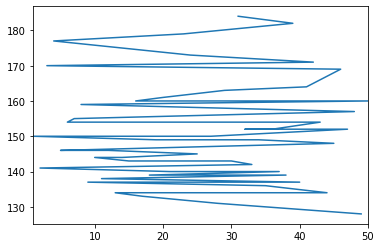

In [62]:
data['Order_Quantity'].value_counts().plot.line()

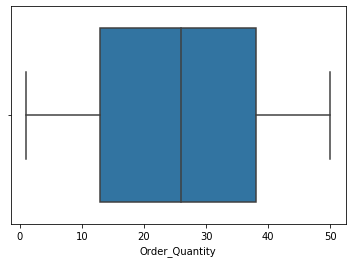

In [63]:
sns.boxplot(x='Order_Quantity',data=data)

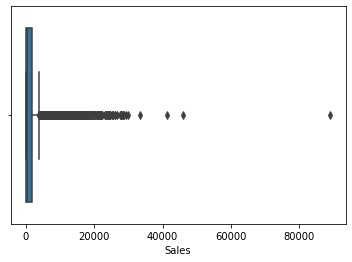

In [64]:
sns.boxplot(x='Sales',data=data)

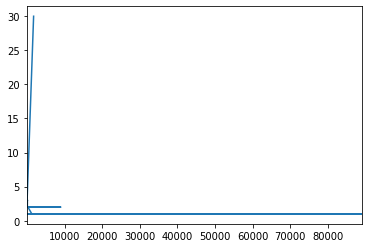

In [65]:
data['Sales'].value_counts().plot.line()

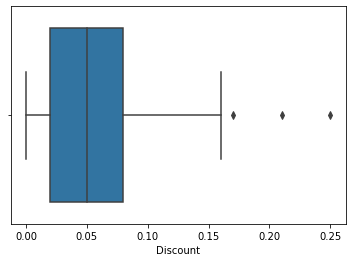

In [66]:
sns.boxplot(x='Discount',data=data)

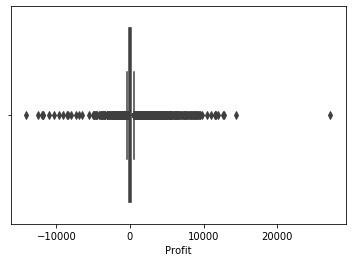

In [67]:
sns.boxplot(x='Profit',data=data)

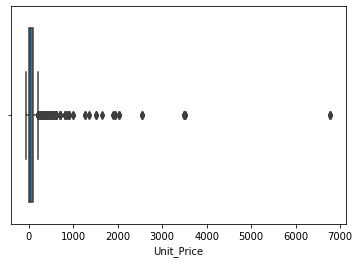

In [68]:
sns.boxplot(x='Unit_Price',data=data)

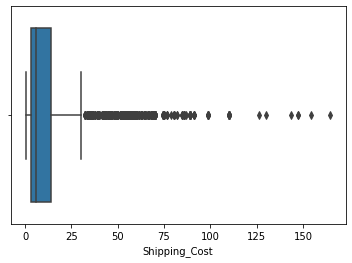

In [69]:
sns.boxplot(x='Shipping_Cost',data=data)

# Categorical ATTRIBUTE

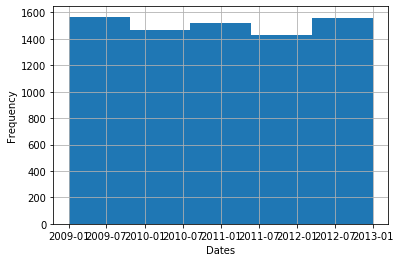

In [70]:
plt.xlabel("Dates")
plt.ylabel("Frequency")
data['Order_Date'].hist(bins=5)

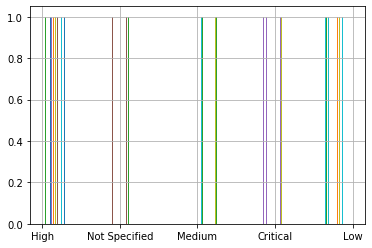

In [71]:
#plt.xlabel("Dates")
#plt.ylabel("Frequency")
data['Order_Priority'].hist(bins=10)

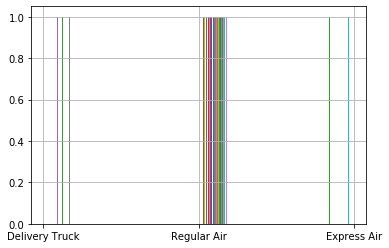

In [72]:
data['Ship_Mode'].hist(bins=10)

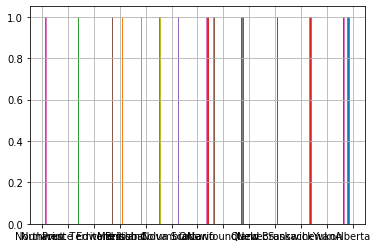

In [73]:
data['Province'].hist(bins=10)

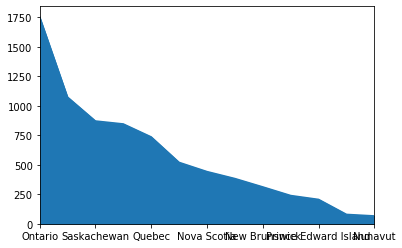

In [74]:
data['Province'].value_counts().plot.area()


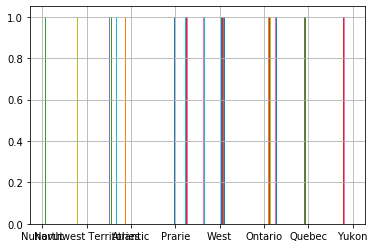

In [75]:
data['Region'].hist(bins=10)

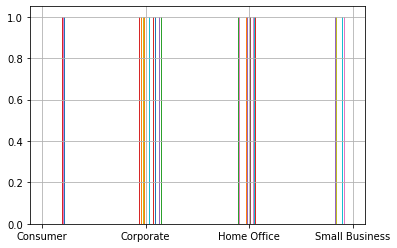

In [76]:
data['Customer_Segment'].hist(bins=10)

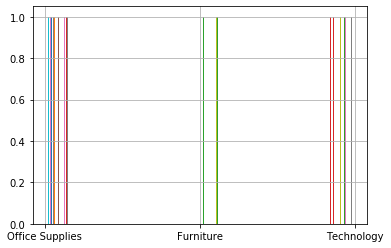

In [77]:
data['Product_Category'].hist(bins=10)

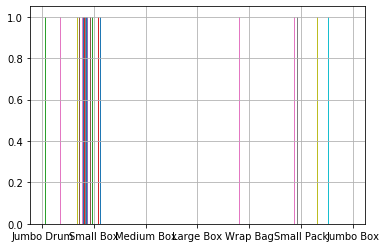

In [78]:
data['Product_Container'].hist(bins=10)

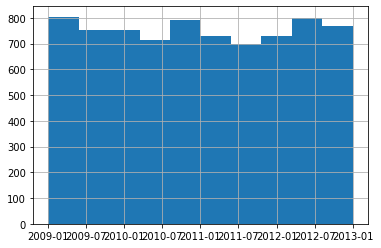

In [79]:
data['Ship_Date'].hist(bins=10)